# Best website to learn about CNN ( Convolutional Neural Network )

https://poloclub.github.io/cnn-explainer/

In [2]:
# Creating first CNN
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Getting dataset

In [29]:
train_data = datasets.FashionMNIST(
    root="data",  # where to download data
    train=True,   # do you want the training data
    download=True, # do you want to download
    transform=ToTensor(), # transforming the image data to tensros
    target_transform=None # how do we want to transform the labels/target
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [30]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [31]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [32]:
targets = train_data.targets
targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [33]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

# Prepare dataloader

Currently, our data is in the form of Pytorch datasets.

`DataLoader` turns data into Python iterables.

More specifically, we want to turn our data into mini batches.

**Why mini batches?**

1. More efficient computationally ( breakdown to 32 images at a time )
2. It gives our neural network more chances to update its gradient per epoch

In [34]:
from torch.utils.data import DataLoader

# hyperparameter of batch size
BATCH_SIZE = 32

# turn data sets into batches
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f9f0387e4c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f9f0387efa0>)

# Building CNN model

In [35]:
class CnnModel(nn.Module):
    def __init__(self, input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                     out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        return x

In [36]:
torch.manual_seed(42)
model = CnnModel(input_shape=1, 
                hidden_units=10,
                output_shape=len(class_names))

# Stepping through `conv2d`

In [24]:
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

test_image.shape

torch.Size([3, 64, 64])

### Create a single conv2d layer

In [19]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels = 10,
                       kernel_size=1,
                       stride=1,
                       padding=0)

# passing the data
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

# Stepping through `Maxpool2d`

In [27]:
# original image shape
test_image.shape

torch.Size([3, 64, 64])

In [26]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through conv layer
test_image_through_conv = conv_layer(test_image)
print(test_image_through_conv.shape)

# pass data through max pool layer
test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(test_image_through_conv_and_maxpool.shape)

torch.Size([10, 64, 64])
torch.Size([10, 32, 32])


> ## Why the data is squeezed after going though maxpool layer

>Here, the `kernel size = 2`, which means that it will take 2x2 matrix and take the max value of all the 4 values and replace 2x2 matrix with single value ( max value ).
That's why it decreased the output tensor shape from [10, 64, 64] to [10, 32, 32].
`Greater the kernel size in max pool layer, greater the squeeze or compression in output layer`.
>>Why the greater value only. **Because it means we are only taking the most important value or most important feature of the image**

# `Practicing on cnn model using dummy data`

In [11]:
rand_image_tensor = torch.randn(size=[1, 28 ,28])
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [13]:
model(rand_image_tensor.unsqueeze(0))

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])


tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

# Training the CNN on originial dataset

### Setup loss function and optimizer

In [37]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                           lr=0.1)

# `Training and Testing loop`

In [38]:
def print_train_time(start: float,
                    end: float,
                    device: torch.device=None):
    total_time = end - start
    return total_time

In [39]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device = "cpu"):

    """
    Performs traning with model
    """
    
    train_loss, train_acc = 0, 0

    # Put model into training mode
    
    #add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):

        # Put data on target device
        X, y = X.to(device), y.to(device)

        # forward pass
        y_pred = model(X)

        #calculate the loss for every batch and accumulate it.
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # calculate accuracy per batch
        train_acc = accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # optimizer zero grad
        optimizer.zero_grad()

        #backprop
        loss.backward()

        # optimizer step
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    # average loss and accuracy per epoch
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [40]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = "cpu"):
    """
    Peforms a testing loop step on model going over data_loader
    """

    test_loss, test_acc = 0, 0

    # put the model in eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X, y in data_loader:

            # send data to target device
            X, y = X.to(device), y.to(device)

            # forward pass
            test_pred = model(X)

            # calculate the loss and acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                   y_pred=test_pred.argmax(dim=1))

        # Adjust matric and print
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [41]:
torch.manual_seed(42)

from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start_cnn_model = timer()

# train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------------------")
    train_step(model=model,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn)
    test_step(model=model,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn)
train_time_end_cnn_model = timer()
total_train_time_cnn_model = print_train_time(start=train_time_start_cnn_model,
                                             end=train_time_end_cnn_model)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------------
Train Loss: 0.59563 | Train acc: 0.05%
Test loss: 0.39714 | Test acc: 85.65%
Epoch: 1
-------------------
Train Loss: 0.36179 | Train acc: 0.04%
Test loss: 0.35345 | Test acc: 86.96%
Epoch: 2
-------------------
Train Loss: 0.32441 | Train acc: 0.05%
Test loss: 0.32050 | Test acc: 88.40%


In [42]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    """
    Returns a dict containing the results of model predicting on data_loader
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # make predictions
            y_pred = model(X)

            # accumulate the loss
            loss += loss_fn(y_pred, y)

            # accumulate the accuracy
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))

        # Average loss and acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__, # only works when model created with class
        "model_loss": loss.item(),
        "model_acc":acc
    }


In [43]:
cnn_model_results = eval_model(
    model=model,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

cnn_model_results

{'model_name': 'CnnModel',
 'model_loss': 0.3204987049102783,
 'model_acc': 88.39856230031948}

# Make and evaluate random predictions 

In [54]:
def make_predicitons(model: torch.nn.Module,
                    data: list,
                    device=None):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample
            sample = torch.unsqueeze(sample, dim=0)
    
            #forward pass
            pred_logits = model(sample)
    
            #get predictions probs
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
    
            pred_probs.append(pred_prob)

    return torch.stack(pred_probs)

In [68]:
import random
#random.seed(42)
test_samples= []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

Text(0.5, 1.0, 'Ankle boot')

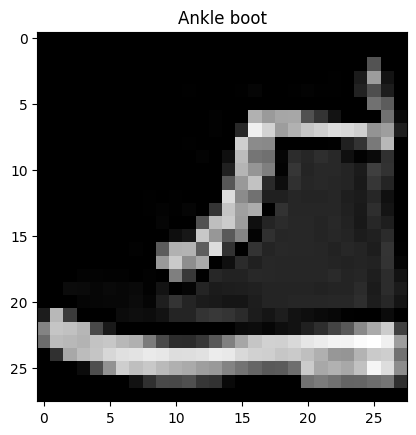

In [69]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

### Make predictions

In [70]:
pred_probs = make_predicitons(model=model,
                              data=test_samples)
pred_probs[:2]

tensor([[1.2235e-04, 6.3275e-05, 1.6919e-05, 6.2684e-05, 3.5387e-06, 3.5214e-02,
         1.0671e-05, 2.0041e-02, 3.2760e-03, 9.4119e-01],
        [5.2603e-05, 3.4777e-06, 4.3166e-05, 1.2036e-05, 5.2174e-06, 1.2246e-03,
         3.0491e-06, 9.6748e-01, 1.7549e-03, 2.9419e-02]])

# Converting preb probs into labels

In [71]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

In [72]:
test_labels

[9, 7, 2, 0, 1, 0, 4, 5, 4]

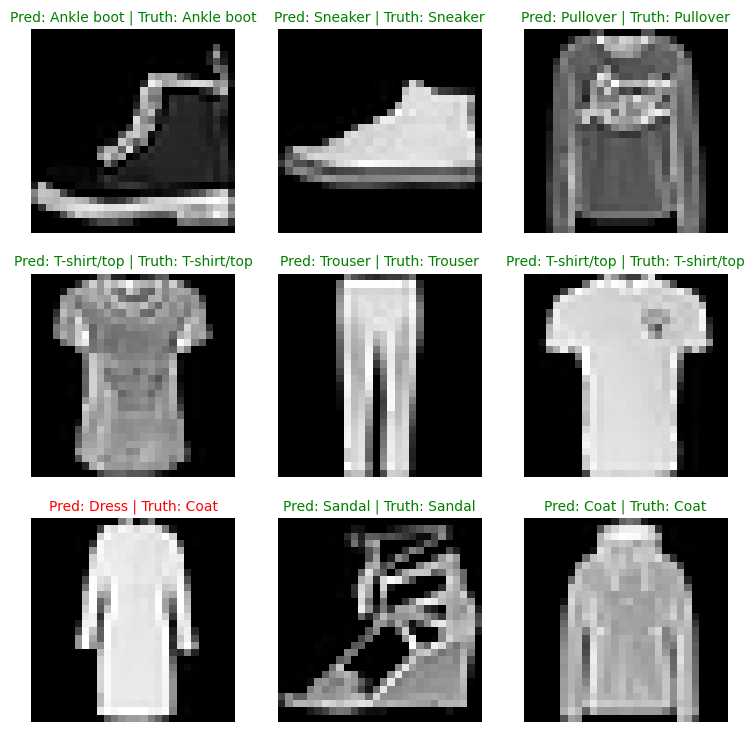

In [73]:
# Plot prediciotns
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    # plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # find the prediciton
    pred_label = class_names[pred_classes[i]]

    # Get the truth label
    truth_label = class_names[test_labels[i]]

    # create a title for plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # check for equality between pred and truth
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis(False)

# `Confusion Matrix`

>### Confusion matrix is a good way for evaluating classification models visually

### **Steps**:
1. Make predicitons with our model
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`.
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix`.

# `Make predictions for all the data`

In [75]:
# Make predicitions

y_preds = []
model.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making pred......."):

        #forward pass
        y_logit = model(X)

        # turn logits into pred probs and then into pred labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        y_preds.append(y_pred)

#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making pred.......:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [76]:
len(y_pred_tensor)

10000

In [80]:
import torchmetrics, mlxtend

In [84]:
!pip install mlxtend==0.19.0

     |████████████████████████████████| 1.3 MB 2.2 MB/s eta 0:00:01
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.1.9
    Uninstalling mlxtend-0.1.9:
      Successfully uninstalled mlxtend-0.1.9


In [85]:
mlxtend.__version__

'0.1.9'

In [87]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

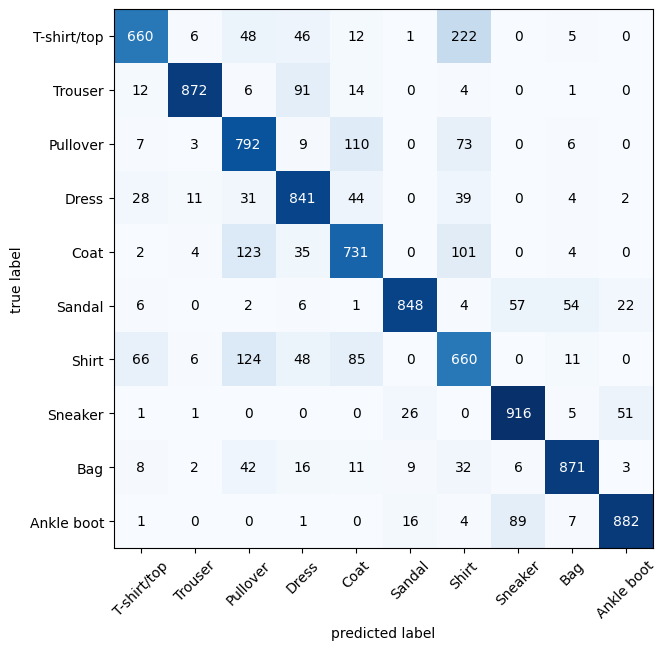

In [90]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)

# plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

> # What does the confusion matrix tell about our model
>So ideally, the diagonal of the confusion matrix must be dark and all the upper and lower triagnular values must be 0. This, means the model has 0 loss and is predicting every item precisely.
> 
>But above as we can see, we have many values.
For example - For true label `Shirt`, the model predicted is as `T-shirt/top` 222 times and 660 times it predicted right.
> 
>So, with the help of using confusion matrix, we can see the performance of the model visually.

# Save and load the model

In [91]:
from pathlib import Path

# create model dir path
MODEL_PATH = Path("CNN_model")
MODEL_PATH.mkdir(parents=True,
                exist_ok=True)

# Create model save
MODEL_NAME= "CNN_computer_vision_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
          f=MODEL_SAVE_PATH)

saving model to: CNN_model/CNN_computer_vision_model.pth


# Load the model and create a new instance

In [92]:
torch.manual_seed(42)

loaded_model = CnnModel(input_shape=1,
                       hidden_units=10,
                       output_shape=len(class_names))

#load the model
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model

CnnModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [94]:
cnn_model_results

{'model_name': 'CnnModel',
 'model_loss': 0.3204987049102783,
 'model_acc': 88.39856230031948}

# Evaluate loaded model

In [95]:
torch.manual_seed(42)

loaded_model_results = eval_model(
    model=loaded_model,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_results

{'model_name': 'CnnModel',
 'model_loss': 0.3204987049102783,
 'model_acc': 88.39856230031948}

## `check if loaded model is producing same results as original model`

In [97]:
torch.isclose(torch.tensor(cnn_model_results["model_loss"]),
             torch.tensor(loaded_model_results["model_loss"]))

tensor(True)